In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt            # library for visualization
import matplotlib
# from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns 
import os,joblib
# ,missingno
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer



In [52]:
data = pd.read_csv(r"D:\New folder\Desktop\train.csv")
data.head(-100)

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.6700,7.0,-11.007,0,0.0445,0.809000,0.000006,0.2360,0.8020,177.164,5.209333,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.6390,6.0,-8.138,1,0.3880,0.416000,NaN,0.1160,0.6880,99.517,206602.000000,4,5
2,2,The Cure,Play For Today,51.0,0.458,0.7310,11.0,-12.049,0,0.1450,0.048700,0.021500,0.1160,0.7840,80.425,218960.000000,4,6
3,3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.2870,5.0,-8.898,0,0.0481,0.834000,NaN,0.0963,0.3240,96.139,332467.000000,3,9
4,4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.4850,9.0,-9.111,1,0.0332,0.517000,0.106000,0.1640,0.5100,71.548,200173.000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14291,14291,AC/DC,For Those About to Rock (We Salute You),65.0,0.370,0.9190,4.0,-5.721,1,0.1020,0.000376,0.419000,0.4900,0.4710,134.021,344240.000000,4,10
14292,14292,"Claude Debussy, Julian Lloyd Webber, Royal Phi...","Rêverie, L. 68",52.0,0.135,0.0428,5.0,-26.085,1,0.0483,0.988000,0.924000,0.1340,0.0394,63.831,4.000000,4,7
14293,14293,Diddy,Diddy (feat. The Neptunes),47.0,0.797,0.8470,6.0,-1.790,0,0.2370,0.384000,0.000388,0.0566,0.9620,100.178,234773.000000,4,5
14294,14294,Ehud Banai,◊ñ◊≥◊ê◊ü ◊ñ◊≥◊ê◊ß ◊û◊ï◊ü ◊ê◊û◊ô,15.0,0.332,0.6220,4.0,-7.538,0,0.0357,0.481000,0.000335,0.1090,0.2420,179.756,260758.000000,3,10


<AxesSubplot:>

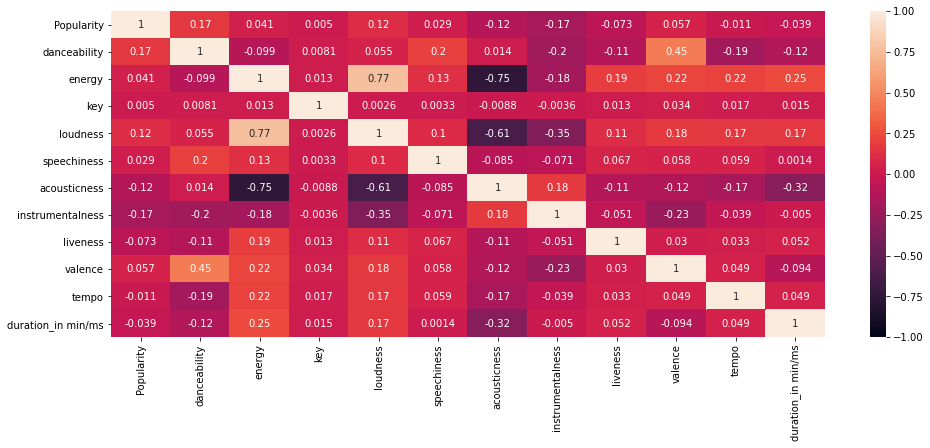

In [53]:
df_cont = data.select_dtypes([int,float]) 

plt.figure(figsize=(16, 6))
sns.heatmap(data = df_cont.corr(), vmin = -1, vmax = 1, annot = True) 

In [54]:
data.isnull().sum()

id                       0
Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [55]:
X=data.drop(columns='Class',axis=1)
y=data['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True ,test_size=0.15 , random_state=42)


y_train

12301     1
3437     10
3328      4
5225      0
5687      9
         ..
5191      2
13418    10
5390      5
860       5
7270      8
Name: Class, Length: 12236, dtype: int64

In [56]:
data['Popularity'].fillna(data['Popularity'].mean(), inplace=True) # Popularity --> mean
data['instrumentalness'].fillna(data['instrumentalness'].mean(), inplace=True) # instrumentalness --> mean
data['key'].fillna(data['instrumentalness'].mean(), inplace=True) # key --> mode (most common)

In [57]:
data.isnull().sum()

id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [58]:
data['Class'].unique()

array([ 3,  5,  6,  9,  1, 10,  0,  7,  2,  8,  4], dtype=int64)

In [59]:
num_cols=[col for col in X_train.columns if X_train[col].dtype in ['int32', 'int64' , 'float32','float64']]
categ_cols=[col for col in X_train.columns if X_train[col].dtype not in ['int32', 'int64' , 'float32','float64']]

In [60]:
num_cols

['id',
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature']

In [61]:
categ_cols

['Artist Name', 'Track Name']

In [62]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
mms = MinMaxScaler()
X_train_scaled = scaler.transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [63]:
num_pipline = Pipeline(steps =
         [
             ('imputer' ,SimpleImputer(strategy='median') ),
             ('scaler' ,MinMaxScaler())
#              ('scaler2' ,StandardScaler())
         ])

X_train_num = num_pipline.fit_transform(X_train[num_cols])
X_test_num = num_pipline.transform(X_test[num_cols])

In [64]:
categ_pipline = Pipeline(steps =
         [
             ('imputer' ,SimpleImputer(strategy='constant',fill_value='missing') ),
             ('ohe' ,OneHotEncoder(handle_unknown='ignore',sparse=False)),
#              ('enc' , LabelEncoder()),
         ])
# OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat = categ_pipline.fit_transform(X_train[categ_cols])
X_test_cat = categ_pipline.transform(X_test[categ_cols])


In [65]:
f_train = np.column_stack((X_train_scaled,X_train_cat))

In [66]:
f_test=np.column_stack((X_test_scaled,X_test_cat))

In [67]:
some_data = data.iloc[1000]

In [68]:
data =pd.DataFrame(f_train)

In [69]:
data_test =pd.DataFrame(f_test)

In [70]:
pd.DataFrame(f_train)

,0,1,2,3,4,5,6,7,8,9,...,17771,17772,17773,17774,17775,17776,17777,17778,17779,17780
0,1.226821,0.363854,1.734303,0.223055,0.953765,-0.831661,0.749606,-0.476057,0.925557,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.904872,1.856196,0.072321,1.060594,NaN,1.360989,0.749606,-0.432154,-0.732611,-0.582213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.931086,1.282218,0.084320,0.235809,1.579299,0.562476,0.749606,-0.453512,-0.468892,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.474878,0.650843,0.792313,-1.690107,0.953765,-0.236284,0.749606,1.232596,0.864227,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.363772,-1.989454,0.444317,-0.763287,-1.235600,0.464724,0.749606,0.354538,1.900381,-0.581923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,-0.483055,-0.382317,-1.121667,0.397365,0.328232,0.098584,-1.334034,-0.464191,-0.792188,-0.567939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12232,1.495447,-1.530272,-1.037668,1.001074,0.015466,0.943389,0.749606,-0.171110,-0.794813,-0.581722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12233,-0.435198,0.880434,2.208298,-0.287122,0.015466,-0.510089,0.749606,4.400723,0.760935,-0.581028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12234,-1.524612,-1.874658,1.620304,0.257066,-1.235600,0.195844,0.749606,0.307075,0.183142,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data.isnull().sum()

0           0
1         301
2           0
3           0
4        1356
         ... 
17776       0
17777       0
17778       0
17779       0
17780       0
Length: 17781, dtype: int64

In [72]:
sgd_clf = SGDClassifier(random_state=42)

In [73]:
data_train=data.fillna(1)
# data_train=data.fillna(0)

In [74]:
data_test=data_test.fillna(1)
# data_test=data_test.fillna(0)

In [75]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,17771,17772,17773,17774,17775,17776,17777,17778,17779,17780
0,1.226821,0.363854,1.734303,0.223055,0.953765,-0.831661,0.749606,-0.476057,0.925557,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.904872,1.856196,0.072321,1.060594,1.000000,1.360989,0.749606,-0.432154,-0.732611,-0.582213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.931086,1.282218,0.084320,0.235809,1.579299,0.562476,0.749606,-0.453512,-0.468892,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.474878,0.650843,0.792313,-1.690107,0.953765,-0.236284,0.749606,1.232596,0.864227,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.363772,-1.989454,0.444317,-0.763287,-1.235600,0.464724,0.749606,0.354538,1.900381,-0.581923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,-0.483055,-0.382317,-1.121667,0.397365,0.328232,0.098584,-1.334034,-0.464191,-0.792188,-0.567939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12232,1.495447,-1.530272,-1.037668,1.001074,0.015466,0.943389,0.749606,-0.171110,-0.794813,-0.581722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12233,-0.435198,0.880434,2.208298,-0.287122,0.015466,-0.510089,0.749606,4.400723,0.760935,-0.581028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12234,-1.524612,-1.874658,1.620304,0.257066,-1.235600,0.195844,0.749606,0.307075,0.183142,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
some_data = data_train.iloc[1000]
some_data

0       -1.693676
1       -0.554510
2       -0.809670
3        0.435628
4        0.953765
           ...   
17776    0.000000
17777    0.000000
17778    0.000000
17779    0.000000
17780    0.000000
Name: 1000, Length: 17781, dtype: float64

In [26]:
sgd_clf.fit(data_train, y_train)


SGDClassifier(random_state=42)

In [28]:
y_pred = sgd_clf.predict(data_test)
y_pred

array([5, 3, 2, ..., 0, 8, 0], dtype=int64)

In [29]:
sgd_clf.predict([some_data])

array([2], dtype=int64)

In [30]:
scores = sgd_clf.decision_function([some_data])
scores

array([[ -47.99861125,   -1.54648833,    0.98916915,  -61.66772402,
         -49.27762938,   -1.88942547,   -1.35546373, -105.56363581,
          -1.1932038 ,   -1.45594148,   -1.0722297 ]])

In [31]:
y_pred = sgd_clf.predict(data_test)


In [32]:
accuracy_score(y_test, y_pred)

0.5708333333333333

In [33]:
y_pred_train = sgd_clf.predict(data_train)

In [34]:
accuracy_score(y_pred_train, y_train)

0.9130434782608695

In [88]:
####################################################################################\


criterion = ['gini', 'entropy']


max_depth = [8,10,12]
min_samples_split = [8,10,12]
min_samples_leaf=[1,2,3,4]

parameters = dict(max_depth=max_depth,
                 min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf)

In [89]:
tree_clf = DecisionTreeClassifier()

In [90]:
# tree_clf_gs = GridSearchCV(tree_clf, parameters)
# tree_clf_gs.fit(data_train,y_train)

In [91]:
# # print('Best Criterion:', tree_clf_gs.best_estimator_.get_params()['criterion'])
# print('Best max_depth:', tree_clf_gs.best_estimator_.get_params()['max_depth'])
# print('Best min_samples_split:', tree_clf_gs.best_estimator_.get_params()['min_samples_split'])
# print('Best min_samples_leaf:', tree_clf_gs.best_estimator_.get_params()['min_samples_leaf'])
# # print(); 
# # print(clf_GS.best_estimator_.get_params()['dec_tree'])

In [35]:
tree_clf = DecisionTreeClassifier(max_depth=10, max_features='auto', criterion='gini', min_samples_leaf=1,
                               min_samples_split=12)
tree_clf.fit(data_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=12)

In [36]:
y_pred = tree_clf.predict(data_test)
y_pred

array([ 5, 10, 10, ..., 10, 10, 10], dtype=int64)

In [37]:
accuracy_score(y_test, y_pred)

0.2986111111111111

In [38]:
y_pred_train = tree_clf.predict(data_train)

In [39]:
accuracy_score(y_pred_train, y_train)

0.3105590062111801

In [40]:
#######################################################################################
rnd_clf=RandomForestClassifier(n_jobs=-1) # n_jobs=-1 uses all cores of the CPU
rnd_clf.fit(data_train, y_train)


RandomForestClassifier(n_jobs=-1)

In [41]:
y_pred = rnd_clf.predict(data_test)
y_pred

array([ 5,  3, 10, ...,  0, 10,  0], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred)

0.5199074074074074

In [43]:
y_pred_train = rnd_clf.predict(data_train)

In [44]:
accuracy_score(y_pred_train, y_train)

1.0

In [49]:
########################################################################################
from sklearn.svm import SVC
svm_clf = SVC()


In [77]:
svm_clf.fit(data_train, y_train)

SVC()

In [78]:
y_pred = svm_clf.predict(data_test)

In [79]:
accuracy_score(y_test, y_pred)

0.5310185185185186

In [ ]:
y_pred_train = svm_clf.predict(data_train)

In [ ]:
accuracy_score(y_pred_train, y_train)